# 🧑‍💻 Ukázka typů dat 

Balíček `pandas` umožňuje práci s několika datovými typy, které jsou datům přiřazeny automaticky při jejich čtení.

☝️ Ne vždy se ale jedná o správně přidělený typ dat! Během úvodního průzkumu dat je tak na nás tento formát zkontrolovat a případně upravit - tzv. konverze/přetypování datového typu (angl. data conversion). Tento krok je součástí předzpracování dat, kdy se věnujeme jejich čištění - to je proces, kdy hledáme a následně opravujeme poškozené nebo nepřesné záznamy. Pod opravou dat se skrývá jak modifikace, tak jejich nahrazení nebo smazání.

## 🐼 Datové typy v `pandas`

V `pandas` rozlišujeme mezi numerickými (tj. číselnými) a textovými datovými typy.

🔢 **Numerické** datové typy zahrnují: 
- `integer` - čísla bez desetinné čárky, tzn. že jsou čísla uložena jako celočíselná (např. '1.3' jako '1'). V `pandas` se často jedná o 64 bitový integer `int64`. Nicméně existuje i 32 bitová varianta `int32`.
- `float` - čísla s desetinnou čárkou, včetně celých čísel (např. '0' je uložena jako '0.0'). I zde se jedná o 64 bitový float `float64` a 32 bitovou variantu `float32`.

Pokud se ve sloupci nachází kombinace integerů a floatů, `pandas` celý sloupec označí za float, takže žádná desetinná čísla nejsou ztracena.

🔤 **Textové** datové typy představují:
- `string` - tak je text je reprezentován v Pythonu. Řetězec může obsahovat znaky i čísla, může se jednat o slovo, větu nebo dokonce několik vět.
- `object` - tak se nazývá řetězec/text v `pandas` a může mít stejnou reprezentaci jako `string`. Navíc může být objektem i graf. 

❗️Tzn. že jako `string` můžeme uložit i '123' nebo '1.23', ale nemůžeme s ním provádět **žádné matematické operace**. ❌

Posledním datovým typem, který můžete defaultně potkat, patří:
- `datetime` - reprezentovaný v `pandas` jako `datetime64` nebo `timedelta` v [ns]. Jedná se o formát, který je vyhrazený pro časové záznamy (datum, čas, rozdíl časových údajů). Nejčastěji se s ním setkáte u časových řad a jeho formátování občas skýtá mnoho radostí. Pro reprezentaci v nativním Pythonu se podívejte na [dokumentaci](https://docs.python.org/2/library/datetime.html).

My se při konverzi dat setkáme ještě s datovým typem `category`. Více si povíme níže. 🔜

## 🕵🏼 Průzkum datových typů

Ukažme si práci s datovými typy na vzorových datech o pizze. 🍕

In [27]:
# import knihoven
import pandas as pd
import numpy as np

In [15]:
# vytvoření datasetu
data = {"Pizza": ["Margherita", "Diavola", "Quattro Formaggi", "Hawai", "Tonno"],
        "Sugo": ["tomato", "tomato", "cream", "tomato", "tomato"],
        "Difficulty": ["1", "3", "3", "1", "5"],
        "Menu": ["Monday", "Tuesday", "Wednesday", "Friday", "Thursday"],
        "Price": ["125", "155.5", "148", "130.9", "185"],
        "Sold": ["78", "56", "67", "42", "54"],
        "Updated": ["29/06/2011", "30/12/2020", "31/07/2013", "28/11/2000", "25/12/2020"]}

In [16]:
# vytvoření DataFrame
df = pd.DataFrame(data)
df1 = df.copy()
# typ objektu
type(df1)

pandas.core.frame.DataFrame

In [17]:
# 5 prvních řádků
df1.head()

,Pizza,Sugo,Difficulty,Menu,Price,Sold,Updated
0,Margherita,tomato,1,Monday,125,78,29/06/2011
1,Diavola,tomato,3,Tuesday,155.5,56,30/12/2020
2,Quattro Formaggi,cream,3,Wednesday,148,67,31/07/2013
3,Hawai,tomato,1,Friday,130.9,42,28/11/2000
4,Tonno,tomato,5,Thursday,185,54,25/12/2020


In [18]:
# datový typ každé proměnné
df1.dtypes

Pizza         object
Sugo          object
Difficulty    object
Menu          object
Price         object
Sold          object
Updated       object
dtype: object

In [19]:
# datový typ jedné proměnné
df1["Price"].dtype

dtype('O')

Typ ‘O’ představuje `object`. 

🔎 Mezi další způsob, jak zobrazit datové typy, patří metoda [pandas.DataFrame.select_dtypes()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html), které musíme zadat, jaký datový typ chceme prohlížet:

In [20]:
# všechny příznaky typu `int64`
df1.select_dtypes(include=['int64']).head()

""
0
1
2
3
4


In [21]:
# podrobnější info o DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pizza       5 non-null      object
 1   Sugo        5 non-null      object
 2   Difficulty  5 non-null      object
 3   Menu        5 non-null      object
 4   Price       5 non-null      object
 5   Sold        5 non-null      object
 6   Updated     5 non-null      object
dtypes: object(7)
memory usage: 412.0+ bytes


Z výpisu výše vidíme, že ne všechna data mají přiřazený správný datový typ. Čekají nás tedy následující úpravy:
- "Pizza" jako nominální příznak,
- "Sugo" binární,
- "Difficulty" jako ordinální, ale reprezentován číselně,
- "Menu" nominální, případně ordinální,
- "Price" je `float`, jenže byl zadán pomocí uvozovek jako `string`,
- "Sold" je `integer`, -||-,
- "Updated" by měl být reprezentován jako `datetime`.

## 👀 Motivace

Proč se tím vůbec zaobíráme v předmětu o vizualizaci dat? Abychom byli schopni data korektně vykreslit a interpretovat, musíme se nejdříve věnovat jejich **správnému načtení a vyčištění**. Předzpracování dat tak není záležitostí jen pro modelování! ☝️

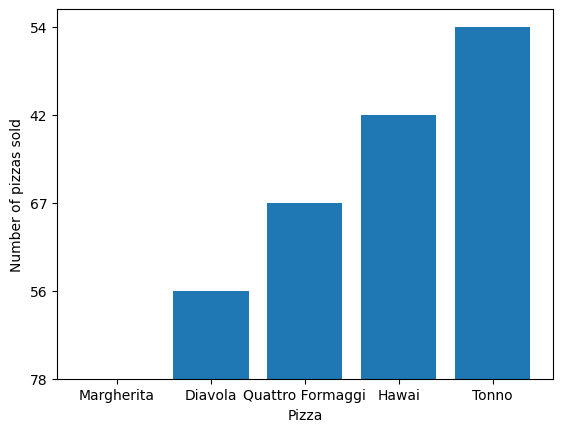

In [22]:
# ukázka chybného grafu
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(df1.Pizza, df1.Sold)
ax.set_ylabel('Number of pizzas sold')
ax.set_xlabel('Pizza')
plt.show()

## 🛠 Přetypování pomocí astype()

Jedním ze způsobů, jak přetypovat data, je použít funkci [pandas.DataFrame.astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html).

### 🔢 Přetypování numerických dat

In [10]:
# přetypování numerického příznaku Price
df1["Price"] = df1["Price"].astype("float64")
df1["Price"].dtype

dtype('float64')

Tímto způsobem jsme schopni přetypovat většinu zbývajících příznaků na jakýkoliv z dostupných datových typů. Nicméně pokud data nevyhovují zvolenému datovému typu, obdržíme `ValueError`. ⛔️

In [23]:
try:
    df1["Pizza"] = df1["Pizza"].astype("int64")
except ValueError as e:
    print("Ive caught your god damn error, here you have it", e)

Ive caught your god damn error, here you have it invalid literal for int() with base 10: 'Margherita'


In [24]:
df1["Pizza"].dtype

dtype('O')

Operaci `df["column_name"].astype()` lze použít na následující konverze (bavíme se teď pouze o přetypování numerických dat ☝️):
- pokud převádíme stringovou reprezentaci integeru na integer,
- pokud převádíme stringovou reprezentaci floatu na float,
- pokud převádíme stringovou reprezentaci integeru na float,
- pokud převádíme float na integer,
- pokud převádíme integer na float.

❗️ Pokud převádíme stringové reprezentace, pak `astype()` používáme na každý sloupec zvlášť, případně využijeme dictionary s více názvy sloupců a třeba i různými datovými typy:

`df = df.astype({"column_name1":"data_type1", "column_name2":"data_type2"})`

Pokud bychom chtěli změnit více numerických příznaků na jiný číselný typ, můžeme použít:

`df = df.astype("int64", errors='ignore')`

Tento příkaz přetypuje všechny numerické příznaky na `integer`. V našem případě se jedná pouze o "Price", kterou jsme již přetypovali na `float64`. Ostatní příznaky by měly zůstat nezměněné (včetně čísel reprezentovaných stringem, bohužel), aniž bychom obdrželi chybovou hlášku (díky `errors='ignore'`).

In [28]:
df1['Price'] = df1['Price'].astype(np.float64)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pizza       5 non-null      object 
 1   Sugo        5 non-null      object 
 2   Difficulty  5 non-null      object 
 3   Menu        5 non-null      object 
 4   Price       5 non-null      float64
 5   Sold        5 non-null      object 
 6   Updated     5 non-null      object 
dtypes: float64(1), object(6)
memory usage: 412.0+ bytes


Nicméně u příznaku "Price" takto přijdeme o desetinné místo, takže tahle ukázka je v našem případě zcestná... 🙅 S numerickými daty budeme pokračovat později. 🔜

### 🔤 Přetypování kategorických dat

☝️ Pomocí metody `astype()` jsme schopni přetypovat i kategorické příznaky. Začněme nominálním příznakem "Pizza":

In [29]:
# přetypování nominálního příznaku Pizza
df1["Pizza"] = df1["Pizza"].astype("category")
df1["Pizza"].dtype

CategoricalDtype(categories=['Diavola', 'Hawai', 'Margherita', 'Quattro Formaggi',
                  'Tonno'],
, ordered=False, categories_dtype=object)

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pizza       5 non-null      category
 1   Sugo        5 non-null      object  
 2   Difficulty  5 non-null      object  
 3   Menu        5 non-null      object  
 4   Price       5 non-null      float64 
 5   Sold        5 non-null      object  
 6   Updated     5 non-null      object  
dtypes: category(1), float64(1), object(5)
memory usage: 589.0+ bytes


Žádná věda! 💪 

V příkladu výše jsme využili výchozího chování `dtype='category'`:
- kategorie jsou odvozeny z dat,
- kategorie nejsou uspořádané.

🧚🏻‍♂️ Pokud bychom chtěli toto chování ovlivnit, použijeme místo `category` instanci typu `CategoricalDtype`. Pozn.: Pokud bychom použili `ordered=False`, pak bychom získali nominální data - je to jeden z možných způsobů.

In [31]:
# přetypování ordinálního příznaku Menu (dny v týdnu)

from pandas.api.types import CategoricalDtype

cat_dtypeMenu = CategoricalDtype(categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"], 
                                 ordered=True)

df1["Menu"] = df1["Menu"].astype(cat_dtypeMenu)
df1["Menu"]

0       Monday
1      Tuesday
2    Wednesday
3       Friday
4     Thursday
Name: Menu, dtype: category
Categories (5, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday']

⭐️ **Vyzkoušejte si sami:**
Stejným způsobem můžete přetypovat ordinální příznak 'Difficulty', který vyjadřuje obtížnost přípravy pokrmu. ⭐️

In [32]:
df1

,Pizza,Sugo,Difficulty,Menu,Price,Sold,Updated
0,Margherita,tomato,1,Monday,125.0,78,29/06/2011
1,Diavola,tomato,3,Tuesday,155.5,56,30/12/2020
2,Quattro Formaggi,cream,3,Wednesday,148.0,67,31/07/2013
3,Hawai,tomato,1,Friday,130.9,42,28/11/2000
4,Tonno,tomato,5,Thursday,185.0,54,25/12/2020


Pro další práci s kategorickými daty se můžete podívat do [dokumentace](https://pandas.pydata.org/docs/user_guide/categorical.html).

## 🛠 Přetypování pomocí to_DataType()

Dalším způsobem je použít funkci [pandas.DataFrame.to_numeric()](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html#pandas.to_numeric) nebo [pandas.DataFrame.to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas.to_datetime).

Při použití `to_numeric()` dojde k automatickému přetypování numerických příznaků na `float64` nebo `int64`.

In [33]:
df2 = df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pizza       5 non-null      object
 1   Sugo        5 non-null      object
 2   Difficulty  5 non-null      object
 3   Menu        5 non-null      object
 4   Price       5 non-null      object
 5   Sold        5 non-null      object
 6   Updated     5 non-null      object
dtypes: object(7)
memory usage: 412.0+ bytes


In [34]:
df2["Sold"]=pd.to_numeric(df2["Sold"])

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pizza       5 non-null      object
 1   Sugo        5 non-null      object
 2   Difficulty  5 non-null      object
 3   Menu        5 non-null      object
 4   Price       5 non-null      object
 5   Sold        5 non-null      int64 
 6   Updated     5 non-null      object
dtypes: int64(1), object(6)
memory usage: 412.0+ bytes


⚡️Pro přetypování více sloupců můžeme využít metodu `apply()`:

In [36]:
df2[["Difficulty", "Price"]] = df2[["Difficulty","Price"]].apply(pd.to_numeric)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pizza       5 non-null      object 
 1   Sugo        5 non-null      object 
 2   Difficulty  5 non-null      int64  
 3   Menu        5 non-null      object 
 4   Price       5 non-null      float64
 5   Sold        5 non-null      int64  
 6   Updated     5 non-null      object 
dtypes: float64(1), int64(2), object(4)
memory usage: 412.0+ bytes


Vidíte, že oba sloupce byly přetypovány správně na `int64` a `float64`. Pojďme ještě vyzkoušet `to_datetime()` na příznaku "Updated" ⏰:

In [ ]:
df2["Updated"]=pd.to_datetime(df2["Updated"], dayfirst=True)
df2.info()

### Přetypování binárního příznaku

Konečně se blížíme do cíle!💥 Jako poslední nám zbývá přetypování binárního příznaku "Sugo", který vypovídá o typu základu - rajčatový 🍅 nebo smetanový 🐄.

⭐️ **Vyzkoušejte si sami:**
Existuje více způsobů, jak tento příznak převést na binární. Jedním z nich může být sestrojení nového příznaku "Tomato", který bude typu `boolean` (tzn. `dtype: bool`) a bude tak nabývat hodnot `True/False`, pokud se bude nebo nebude jednat o rajčatový základ. ⭐️

In [ ]:
# TODO - prostor pro váš kód

## 🫣 Závěr

Závěrem si ukažme motivační graf na přetypovaných datech:

In [ ]:
# ukázka správného (i když ne úplně pěkného) grafu
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(df2.Pizza, df2.Sold)
ax.set_ylabel('Number of pizzas sold')
ax.set_xlabel('Pizza')
plt.show()

# 🎉 A to je vše! 🎉 